# Importing Importing Main libraries


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Loading Dataset


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/DS Bootcamp Cohort 11/StudentsPerformance.csv')

# Understanding Data And finding missing values

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# The code below shows all the missing values in dataset if there are any.

df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


### As there are no missing values we will move forward with the proccess

In [6]:
# Checking the Data types of each column to distinguish between categorical data and numerical data.

df.dtypes

,0
gender,object
race/ethnicity,object
parental level of education,object
lunch,object
test preparation course,object
math score,int64
reading score,int64
writing score,int64


# Performing Machine Learning.

In [7]:
# Initializing the label encoder
# The reason i am using label encoder instead of One-Hot encoding is that it assigns numerical values to all the categories.
# While One-Hot encoding on other hand creates multiple binary columns and it can lead to high-dimensional dataset.

le = LabelEncoder()

In [8]:
# Putting all the categorical valraibles in a single variable so we can a run a loop on them further along the line.

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [9]:
# Running Loop on our categorical data to encode them in label encoder.
# This loop will encode all of the categorical columns using lable encoder.

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
# Checking that all our data is encoded properly.

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [11]:
# Select numerical columns that need to be scaled
numerical_cols = ['math score', 'reading score', 'writing score']


# Apply Min-Max Scaling (Normalization)

# This method scales values between 0 and 1 to ensure all numbers stay within a fixed range.

min_max_scaler = MinMaxScaler()  # Create the Min-Max scaler
df_normalized = df.copy()  # Make a copy of the original dataset
df_normalized[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])  # Apply scaling


# Apply Standard Scaling (Standardization)

# This method **adjusts values so they have a mean of 0 and a standard deviation of 1**.
# It ensures features have a common scale while keeping relative differences intact.
standard_scaler = StandardScaler()  # Create the Standard scaler
df_standardized = df.copy()  # Make another copy of the dataset
df_standardized[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])  # Apply scaling

#  What's the difference between these methods?

#  Min-Max Scaling: Best for models sensitive to absolute values, like KNN or neural networks.
#  Standard Scaling: Works well for algorithms that assume normal distribution, like logistic regression.

print(df_normalized.head())  # Check normalized data
print(df_standardized.head())  # Check standardized data

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  
0                        1        0.72       0.662651       0.711111  
1                        0        0.69       0.879518       0.866667  
2                        1        0.90       0.939759       0.922222  
3                        1        0.47       0.481928       0.377778  
4                        1        0.76       0.734940       0.722222  
   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            

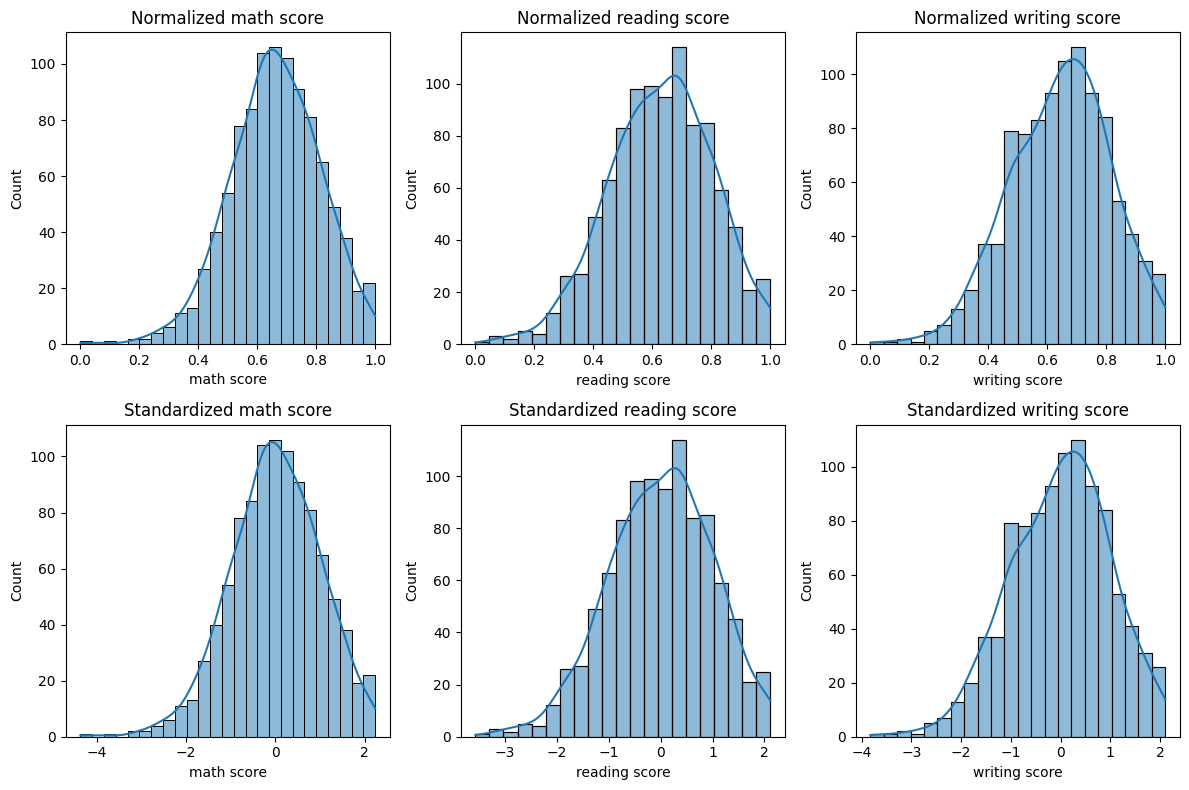

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import visualization libraries


# Create subplots to compare distributions

# This creates a figure with 2 rows and 3 columns (one for each feature).
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows (Normalized & Standardized), 3 columns (Features)


# Plot histograms for each feature

# We loop through each numerical column and create two plots:
# - One for Min-Max Scaled Data (Normalization)
# - One for Standard Scaled Data (Standardization)

for i, col in enumerate(numerical_cols):
    sns.histplot(df_normalized[col], ax=axes[0, i], kde=True)  # Normalized data in first row
    sns.histplot(df_standardized[col], ax=axes[1, i], kde=True)  # Standardized data in second row


# Set titles for each subplot

# This labels each plot so we know which feature is being displayed.
for i in range(3):
    axes[0, i].set_title(f"Normalized {numerical_cols[i]}")  # Titles for normalized features
    axes[1, i].set_title(f"Standardized {numerical_cols[i]}")  # Titles for standardized features

# Adjust layout for better display

# Ensures plots are spaced properly and do not overlap.
plt.tight_layout()


# Show the final plots

plt.show()

## Feature Selection

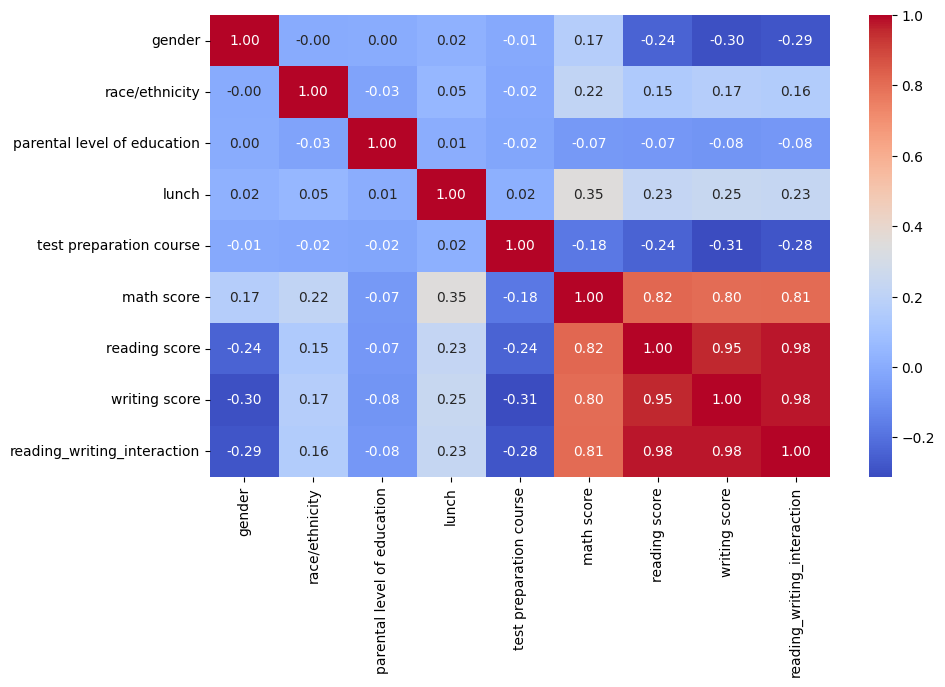

In [23]:
# To select the best features we will use co relation matrix to check the corelation of on column with others.

# Calculate correlation matrix

correlation_matrix = df.corr()

# Creating Graph to visualize our co relation matrix

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression  # Import tools for feature selection

# Select features (all columns except 'math score') and target variable

X = df.drop(columns=["math score"])  # Select all the features except math score that should be used for prediction
y = df["math score"]  # Target variable to predict

# Choose top 5 most relevant features using statistical scoring

selector = SelectKBest(score_func=f_regression, k=5)  # Uses correlation to pick best predictors
X_selected = selector.fit_transform(X, y)  # Apply selection process

# Print the names of the selected features

selector.get_feature_names_out()  # Displays top features influencing math scores

array(['race/ethnicity', 'lunch', 'reading score', 'writing score',
       'reading_writing_interaction'], dtype=object)

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Select numerical features for Polynomial Regression

numerical_features = ["reading score", "writing score"]

# Create interaction feature

df["reading_writing_interaction"] = df["reading score"] * df["writing score"]

# Generate polynomial features (degree 2)

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(df[numerical_features])

# Convert to DataFrame

poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(numerical_features))

# Merge with original dataset

df_final = pd.concat([df, poly_df], axis=1)

print(df_final.head())  # Display transformed data

   gender  race/ethnicity  parental level of education  lunch  \
0       0               1                            1      1   
1       0               2                            4      1   
2       0               1                            3      1   
3       1               0                            0      0   
4       1               2                            4      1   

   test preparation course  math score  reading score  writing score  \
0                        1          72             72             74   
1                        0          69             90             88   
2                        1          90             95             93   
3                        1          47             57             44   
4                        1          76             78             75   

   reading_writing_interaction  reading score  writing score  reading score^2  \
0                         5328           72.0           74.0           5184.0   
1             

### **Interpretation of Generated Features**

**Original Features**  
- `reading score` and `writing score` represent students' test performance.

**Interaction Feature**  
- `reading_writing_interaction`: Multiplying reading and writing scores captures their combined influence on math scores.

**Polynomial Features (Degree 2)**  
- `reading score²`: Squared values highlight non-linear effects of reading on math performance.
- `writing score²`: Squared values for writing measure higher-order trends.
- `reading score × writing score`: Captures interactions between reading and writing.

**Why These Features Matter?**  
- Helps Polynomial Regression detect deeper relationships.
- Improves accuracy compared to simple linear models.


# Model Building

In [26]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)

X = df.drop(columns=["math score"])  # Select all predictors
y = df["math score"]  # Target variable

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (800, 8)
Test Set Size: (200, 8)


In [27]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

print("Multilinear Regression Model Trained!")

Multilinear Regression Model Trained!


In [31]:
from sklearn.preprocessing import PolynomialFeatures  # Import tool to create polynomial features
from sklearn.pipeline import make_pipeline  # Import pipeline to combine multiple steps
from sklearn.linear_model import LinearRegression  # Import Linear Regression model


# Initialize Polynomial Regression Model

# This creates a pipeline that:
# - First transforms features into polynomial form (degree 2)
# - Then applies Linear Regression to fit the transformed data
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())


# Train the Model on Training Data

# The model learns the relationship between features and math scores
poly_model.fit(X_train, y_train)


# Make Predictions on Test Data
# The trained model predicts math scores based on test features
y_pred_poly = poly_model.predict(X_test)


# Confirm Model Training Completion

print("Polynomial Regression Model Trained!")  # Displays a message when training is done

Polynomial Regression Model Trained!


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Multilinear Regression Evaluation
rmse_linear = mean_squared_error(y_test, y_pred_linear) ** 0.5  # Square root of MSE
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Polynomial Regression Evaluation
rmse_poly = mean_squared_error(y_test, y_pred_poly) ** 0.5  # Square root of MSE
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print(" Multilinear Regression:")
print(f"RMSE: {rmse_linear:.2f}, MAE: {mae_linear:.2f}, R²: {r2_linear:.2f}")

print("\n Polynomial Regression:")
print(f"RMSE: {rmse_poly:.2f}, MAE: {mae_poly:.2f}, R²: {r2_poly:.2f}")

 Multilinear Regression:
RMSE: 5.34, MAE: 4.14, R²: 0.88

 Polynomial Regression:
RMSE: 5.65, MAE: 4.41, R²: 0.87


### **Interpretation of Model Performance**

**Multilinear Regression:**  
- **RMSE:** 5.34 → Average prediction error is **5.34 points**.  
- **MAE:** 4.14 → Typical absolute error is **4.14 points**.  
- **R²:** 0.88 → Model explains **88% of the variance** in math scores.

**Polynomial Regression:**  
- **RMSE:** 5.65 → Slightly higher error compared to linear regression.  
- **MAE:** 4.41 → Slightly larger absolute error.  
- **R²:** 0.87 → Explains **87% of variance**, slightly less than multilinear regression.

### **Key Takeaways**
- **Multilinear Regression performs slightly better** based on RMSE, MAE, and R².  
- **Polynomial Regression may be overfitting**, as its complexity does not improve accuracy.  
- **Further tuning** of polynomial degree or features might help optimize performance.

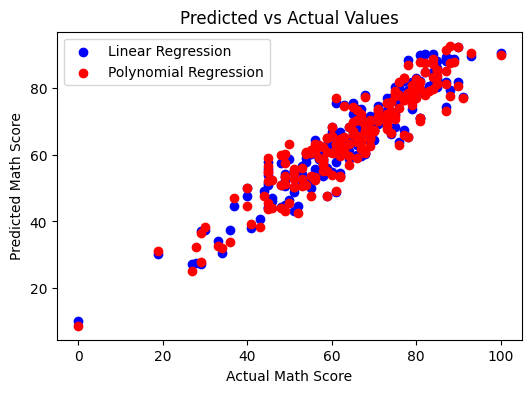

In [21]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_linear, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_poly, color="red", label="Polynomial Regression")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

### **Interpretation of Predicted vs Actual Math Scores**

- **Linear Regression (Blue Dots)**  
  - Shows a stable trend, indicating a simple relationship between features and math scores.  
  - Predictions are relatively aligned with actual values.

- **Polynomial Regression (Red Dots)**  
  - Captures more complex patterns but shows some variation.  
  - Possible overfitting if predictions deviate too much from actual values.

### **Key Takeaways**
- **Linear Regression** performs consistently.  
- **Polynomial Regression** may need tuning to reduce potential overfitting.  